# Davis Southern Club Women

The [data](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html
) was collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The graph is bipartite (clubs, women). The goal will be to look into the relationships between the women and the social events.

[Explanation](https://youtu.be/mVBp0GPdsjI)

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite

## Import Data

The data is initially store as two dictionaries called *top* and *bottom*. Within these two keys, we can access the women and the social events

In [2]:
G = nx.davis_southern_women_graph()

G.graph

{'top': ['Evelyn Jefferson',
  'Laura Mandeville',
  'Theresa Anderson',
  'Brenda Rogers',
  'Charlotte McDowd',
  'Frances Anderson',
  'Eleanor Nye',
  'Pearl Oglethorpe',
  'Ruth DeSand',
  'Verne Sanderson',
  'Myra Liddel',
  'Katherina Rogers',
  'Sylvia Avondale',
  'Nora Fayette',
  'Helen Lloyd',
  'Dorothy Murchison',
  'Olivia Carleton',
  'Flora Price'],
 'bottom': ['E1',
  'E2',
  'E3',
  'E4',
  'E5',
  'E6',
  'E7',
  'E8',
  'E9',
  'E10',
  'E11',
  'E12',
  'E13',
  'E14']}

We then take these dictionaries and split them into their respective categories, *women* and *clubs*, while inputing them into a biadjacency matrix

In [3]:
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (np.int64(0), np.int64(0))	1
  (np.int64(0), np.int64(1))	1
  (np.int64(0), np.int64(2))	1
  (np.int64(0), np.int64(3))	1
  (np.int64(0), np.int64(4))	1
  (np.int64(0), np.int64(5))	1
  (np.int64(0), np.int64(7))	1
  (np.int64(0), np.int64(8))	1
  (np.int64(1), np.int64(0))	1
  (np.int64(1), np.int64(1))	1
  (np.int64(1), np.int64(2))	1
  (np.int64(1), np.int64(4))	1
  (np.int64(1), np.int64(5))	1
  (np.int64(1), np.int64(6))	1
  (np.int64(1), np.int64(7))	1
  (np.int64(2), np.int64(1))	1
  (np.int64(2), np.int64(2))	1
  (np.int64(2), np.int64(3))	1
  (np.int64(2), np.int64(4))	1
  (np.int64(2), np.int64(5))	1
  (np.int64(2), np.int64(6))	1
  (np.int64(2), np.int64(7))	1
  (np.int64(2), np.int64(8))	1
  (np.int64(3), np.int64(0))	1
  (np.int64(3), np.int64(2))	1
  :	:
  (np.int64(12), np.int64(7))	1
  (np.int64(12), np.int64(8))	1
  (np.int64(12), np.int64(9))	1
  (np.int64(12), np.int64(11))	1
  (np.int64(12), np.int64(12))	1
  (np.int64(12), np.int64(13))	1
  (np

Next we will project these women as nodes and calculate the number of friends, while also taking these degrees and weight to count the total number of shared contacts. 

We find that the spread of number of friends are not that large for most of the network. We have a majority of women having at least 15-17 friends, in turn a small differene in degrees. 

In [21]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
w_degree_df = pd.DataFrame(list(W.degree()), columns=['Member', 'Friends'])
w_degree_df.sort_values(by='Friends', ascending=False)

,Member,Friends
0,Evelyn Jefferson,17
8,Ruth DeSand,17
14,Helen Lloyd,17
13,Nora Fayette,17
12,Sylvia Avondale,17
9,Verne Sanderson,17
2,Theresa Anderson,17
7,Pearl Oglethorpe,16
10,Myra Liddel,16
11,Katherina Rogers,16


However, when we weight the total number of shared contacts, we find that this list changes. **Evelyn Jefferson** may be in the top 3 within this network, but now **Theresa Anderson** clearly has a larger importance within the network.

In [22]:
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
w_weight_df = pd.DataFrame(list(W.degree(weight='weight')), columns=['Member', 'Friend_Meetings'])
w_weight_df = w_weight_df.sort_values(by='Friend_Meetings', ascending=False)
w_weight_df

,Member,Friend_Meetings
2,Theresa Anderson,57
0,Evelyn Jefferson,50
3,Brenda Rogers,46
12,Sylvia Avondale,46
1,Laura Mandeville,45
13,Nora Fayette,43
8,Ruth DeSand,40
9,Verne Sanderson,38
11,Katherina Rogers,37
6,Eleanor Nye,36


We can see in the merged table that some people with less than 17 friends, can be atop of this list.

In [24]:
w_merge_df = w_degree_df.merge(w_weight_df).sort_values(by='Friend_Meetings', ascending=False).set_index('Member')
w_merge_df

,Friends,Friend_Meetings
Member,,
Theresa Anderson,17,57
Evelyn Jefferson,17,50
Brenda Rogers,15,46
Sylvia Avondale,17,46
Laura Mandeville,15,45
Nora Fayette,17,43
Ruth DeSand,17,40
Verne Sanderson,17,38
Katherina Rogers,16,37


A better representation of this would be using a heatmap to see where we have someone who has high number of friends, while also having a high number of shared contacts. **Theresa Anderson** actually ties with the top number of friends of 17, but once again we can see she also has the largest lead in shared contacts in the network leading us to believe she is one of the most important nodes in this network.

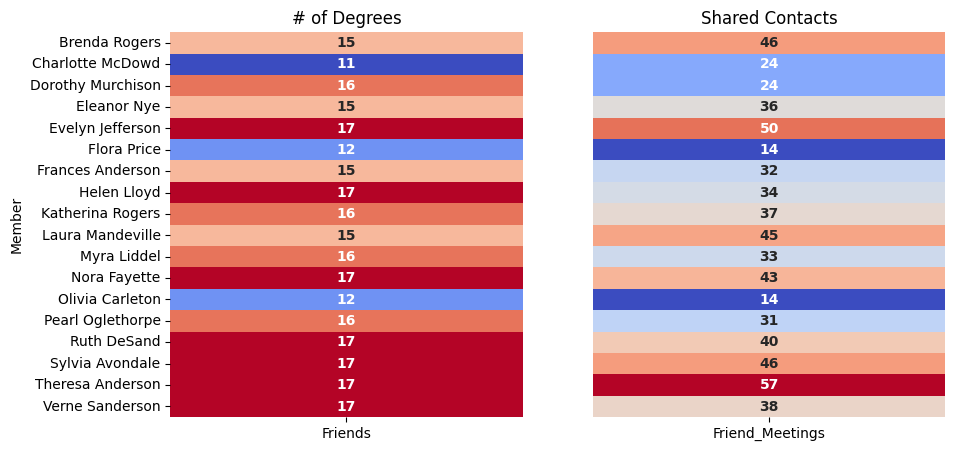

In [25]:
fig, axes = plt.subplots(1, 2, 
                         figsize=(10, 5), 
                         sharey=True)

sns.heatmap(w_degree_df.sort_values(by='Member', ascending=True).set_index('Member'), 
            annot=True, 
            annot_kws={"fontweight": "bold"},
            cmap="coolwarm", 
            cbar=False,
            ax=axes[0])
axes[0].set_title("# of Degrees")

sns.heatmap(w_weight_df.sort_values(by='Member', ascending=True).set_index('Member'), 
            annot=True, 
            annot_kws={"fontweight": "bold"},
            cmap="coolwarm", 
            cbar=False,
            ax=axes[1])
axes[1].set_title("Shared Contacts")
axes[1].set_ylabel("")
axes[1].tick_params(left=False)

plt.show()

## Plot Network

Next we will plot the network layout of clubs and women.

## Women

Focusing solely on the women within the network, we will want to highlight the top 5 women whose weights have the most importance in the network. When we do this, we quickly see 4 out of the 5 women are actually clustered together:

- Theresa Anderson
- Evelyn Jefferson
- Brenda Rogers
- Laura Mandeville

This is quite interesting, as if we wanted to bring together the highest possibility of the whole network coming together at a social event, inviting these four women would bring the best chances to have that happen. 

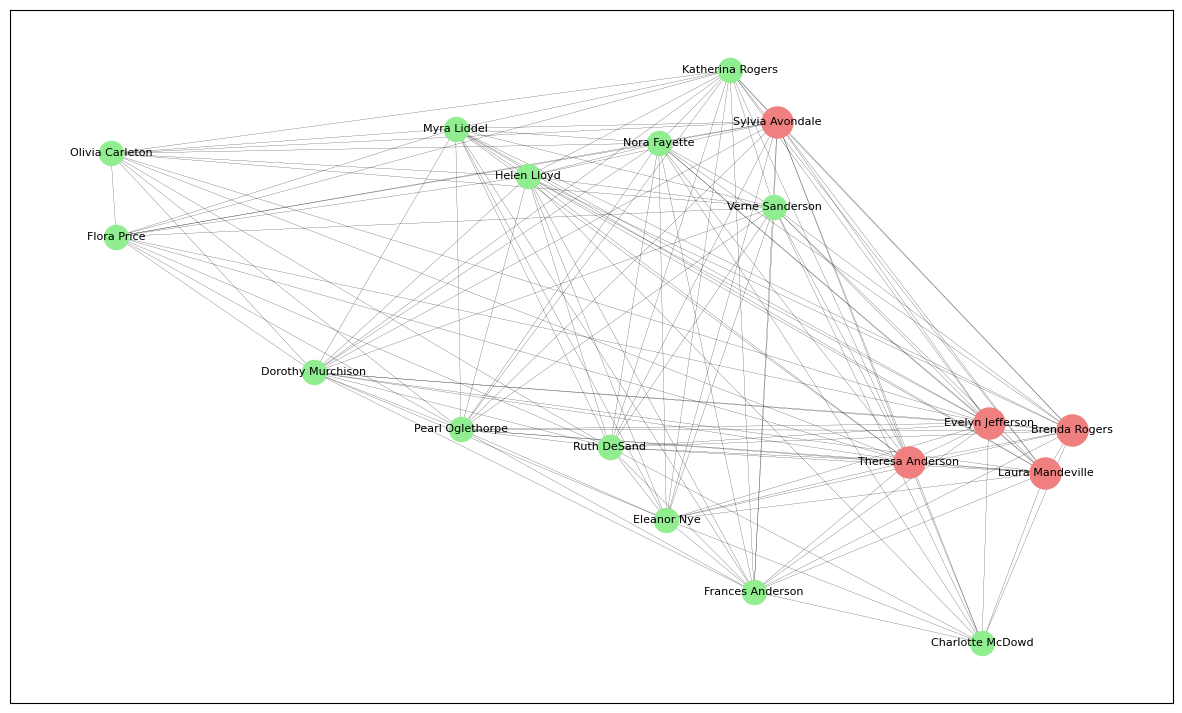

In [34]:
pos = nx.spring_layout(G, seed=123)  

fig, ax = plt.subplots(figsize=(15, 9))

nx.draw_networkx_nodes(W, pos, node_size=300, node_color="lightgreen")
nx.draw_networkx_edges(W, pos, width=0.15)
nx.draw_networkx_labels(W, pos, font_size=8)

nx.draw_networkx_nodes(
    W, pos, 
    nodelist=w_merge_df[:5].index, 
    node_size=500, 
    node_color="lightcoral" 
)

## Clubs

Once again lets evaluate clubs similarly to how we did women. We find that there are a few clubs with 13 members while the rest have 8 members. 

In [27]:
# project bipartite graph onto club nodes
C = bipartite.projected_graph(G, clubs)
c_degree_df = pd.DataFrame(list(C.degree()), columns=['Club', 'Members'])
c_degree_df.sort_values(by='Members', ascending=False)

,Club,Members
5,E6,13
6,E7,13
7,E8,13
8,E9,13
0,E1,8
1,E2,8
2,E3,8
3,E4,8
4,E5,8
9,E10,8


As we weight our degrees to measure attendance at these clubs, we quikcly find out that club **E8** has the highest attendance out of all the social meetings

In [28]:
# project bipartite graph onto club nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared members
C = bipartite.weighted_projected_graph(G, clubs)
c_weight_df = pd.DataFrame(list(C.degree(weight='weight')), columns=['Club', 'Attendance'])
c_weight_df = c_weight_df.sort_values(by='Attendance', ascending=False)
c_weight_df

,Club,Attendance
7,E8,59
6,E7,48
8,E9,46
5,E6,41
4,E5,38
2,E3,32
11,E12,28
9,E10,25
3,E4,23
1,E2,20


Combining both tables, we can see how the number of members (degree) versus attendance (weighted) compares

In [29]:
c_merge_df = c_degree_df.merge(c_weight_df).sort_values(by='Attendance', ascending=False).set_index('Club')
c_merge_df

,Members,Attendance
Club,,
E8,13,59
E7,13,48
E9,13,46
E6,13,41
E5,8,38
E3,8,32
E12,8,28
E10,8,25
E4,8,23


A better comparison would be using our heatmaps again. We see that club **E8** clearly leads in both members and attendance within the network

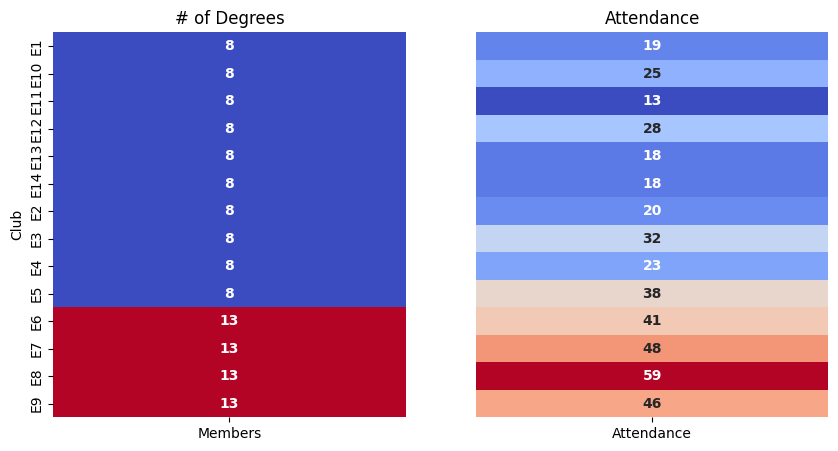

In [30]:
fig, axes = plt.subplots(1, 2, 
                         figsize=(10, 5), 
                         sharey=True)

sns.heatmap(c_degree_df.sort_values(by='Club', ascending=True).set_index('Club'), 
            annot=True, 
            annot_kws={"fontweight": "bold"},
            cmap="coolwarm", 
            cbar=False,
            ax=axes[0])
axes[0].set_title("# of Degrees")

sns.heatmap(c_weight_df.sort_values(by='Club', ascending=True).set_index('Club'), 
            annot=True, 
            annot_kws={"fontweight": "bold"},
            cmap="coolwarm", 
            cbar=False,
            ax=axes[1])
axes[1].set_title("Attendance")

axes[0].tick_params(axis='y', labelrotation=90)

    
axes[1].set_ylabel("")
axes[1].tick_params(left=False)

Highlighting our top 5 nodes (clubs), we see this centralized core of nodes, where the other social events splinter off from these. If our intentions are to have the highest influence at these other events, it would be important to target these top 5 clubs so that their reach can impact these outer nodes. 

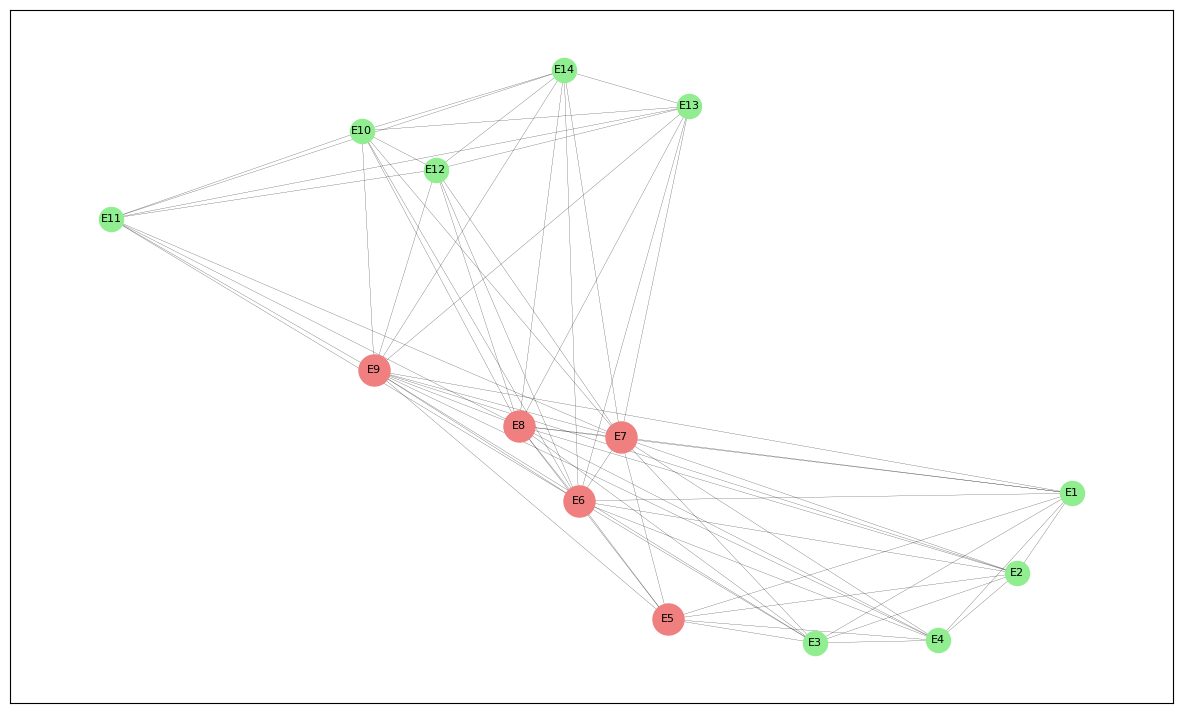

In [33]:
pos = nx.spring_layout(G, seed=123)  

fig, ax = plt.subplots(figsize=(15, 9))

nx.draw_networkx_nodes(C, pos, node_size=300, node_color="lightgreen")
nx.draw_networkx_edges(C, pos, width=0.15)
nx.draw_networkx_labels(C, pos, font_size=8)

nx.draw_networkx_nodes(
    C, pos, 
    nodelist=c_merge_df[:5].index, 
    node_size=500, 
    node_color="lightcoral"
)

## Plotting Women and Clubs

Now we will plot to find how this bipartite looks when combined with both women and clubs. The network itself doesn't show anything of interest with its shape.

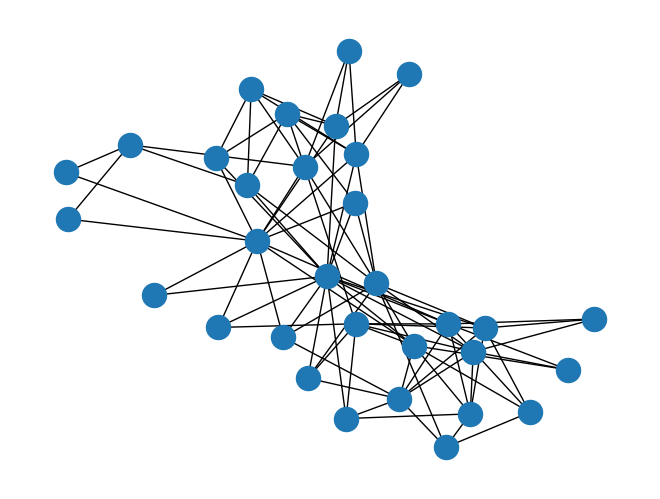

In [58]:
pos = nx.spring_layout(G, seed=123) 
nx.draw(G, pos)
plt.show()

We will look into this bipartite, using eigenvector centrality as our measurement of centrality. When we look for the top 5 nodes in this network, we find the same results of our earlier findings. The most important clubs are **E7**, **E8**, **E9**, while the most important women are **Theresa Anderson** and **Evelyn Jefferson**. In the end, for the most important people and social events to target, it would be these nodes as they would have the largest influence in relationships within our network. 

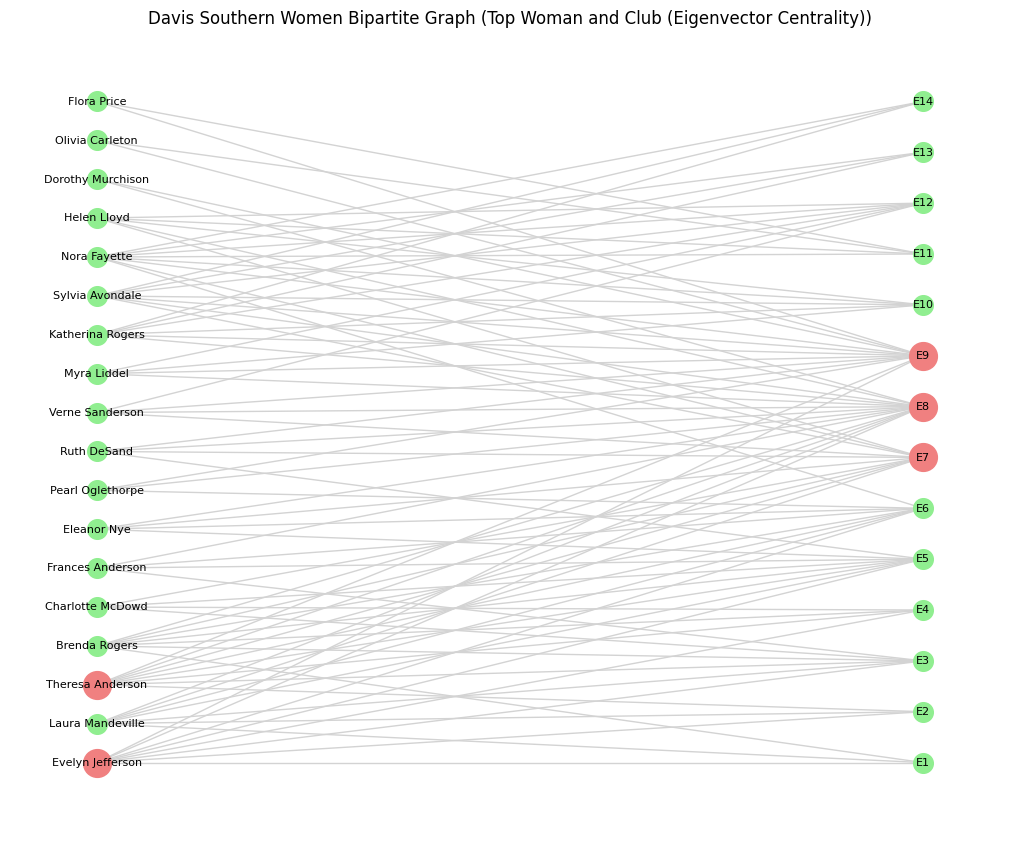

In [68]:
eigenvector_centrality = nx.eigenvector_centrality(G)

top_5_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]

pos = nx.bipartite_layout(G, women)

plt.figure(figsize=(10, 8)) 
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=200, edge_color='lightgray',
        font_size=8)

nx.draw_networkx_nodes(G, pos, nodelist=top_5_nodes, node_color='lightcoral', node_size=400)

plt.title("Davis Southern Women Bipartite Graph (Top Woman and Club [Eigenvector Centrality])")
plt.show()